In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

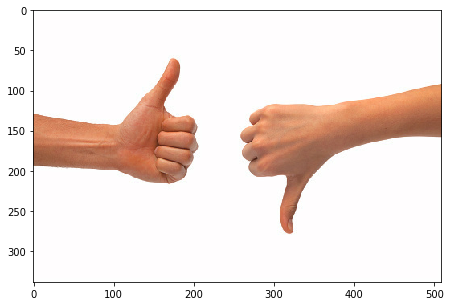

In [2]:
image = cv2.imread('images/thumbs_up_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(image)

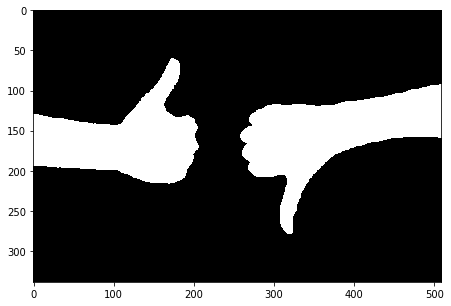

In [3]:
# convert to gray image
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(gray,225, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,5))
plt.imshow(binary, cmap='gray')

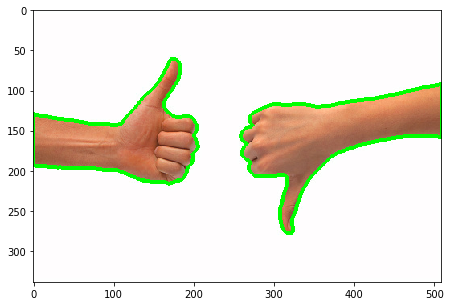

In [4]:
contours, hierarcy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

imgcopy = np.copy(image)
draw = cv2.drawContours(imgcopy, contours, -1, (0,255,0), 3)

plt.figure(figsize=(10,5))
plt.imshow(draw)

In [5]:
def orientations(contours):
    # Fit an ellipse to a contour and extract the angle from that ellipse
    angles = []
    for item in contours:
        (x,y), (MA,ma), angle = cv2.fitEllipse(item)
        angles.append(angle)
    return angles
# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


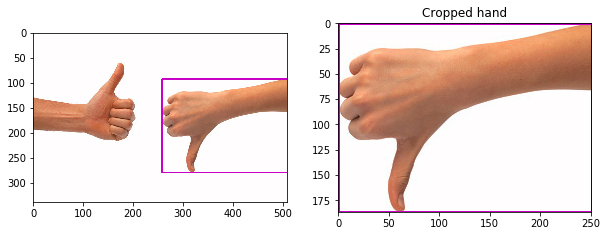

In [6]:
def hand_crop(images, selected_contour):
    
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    box_image = cv2.rectangle(image, (x,y), (x+w,y+h), (200,0,200),2)
    
    cropped_image = np.copy(image)
    cropped_image = image[y: y + h, x: x + w]
    return box_image, cropped_image

selected_contours = contours[0]
box, hand = hand_crop(image, selected_contours)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(box)

ax2.set_title('Cropped hand')
ax2.imshow(hand)